In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

In [225]:
print("reading data...")
data = pd.read_csv("Fake News Detection Dataset.csv")
df = data.copy()



reading data...


In [226]:
df.head()


ID  Word_Count  Number_of_Sentence  Unique_Words  Average_Word_Length  \
0  1606          10                   4            24             6.176750   
1  3718          10                   8            25             5.826770   
2  2634          10                   7            18             4.619040   
3  5560          10                   6            18             4.961424   
4  7494          10                   4            21             4.114324   

   Label  
0      1  
1      1  
2      1  
3      1  
4      1

In [227]:

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")



Number of rows: 4500
Number of columns: 6


In [228]:
print("Data Types: ")
print(df.dtypes)


Data Types: 
ID                       int64
Word_Count               int64
Number_of_Sentence       int64
Unique_Words             int64
Average_Word_Length    float64
Label                    int64
dtype: object


In [229]:
print("Null Values: ")
print(df.isnull().sum())


Null Values: 
ID                     0
Word_Count             0
Number_of_Sentence     0
Unique_Words           0
Average_Word_Length    0
Label                  0
dtype: int64


In [230]:
print("Data Description: ")
df.describe()

Data Description: 


ID   Word_Count  Number_of_Sentence  Unique_Words  \
count  4500.000000  4500.000000         4500.000000   4500.000000   
mean   5469.140000    53.934000            8.934667     24.943333   
std    2599.193059    24.872743            3.407847     11.540708   
min    1002.000000    10.000000            4.000000      5.000000   
25%    3228.750000    35.000000            6.000000     17.000000   
50%    5449.500000    52.000000            9.000000     22.000000   
75%    7706.750000    75.000000           12.000000     33.000000   
max    9999.000000   100.000000           15.000000     50.000000   

       Average_Word_Length        Label  
count          4500.000000  4500.000000  
mean              4.968105     0.329556  
std               1.152394     0.470104  
min               3.000385     0.000000  
25%               3.980553     0.000000  
50%               4.906200     0.000000  
75%               5.996111     1.000000  
max               6.999799     1.000000

In [231]:

for column in df.columns:
  print(f"Unique values for '{column}': {df[column].unique()}")


Unique values for 'ID': [1606 3718 2634 ... 9445 4149 9877]
Unique values for 'Word_Count': [ 10  39  11  69  12  85  13  14  94  27  28  15  42  38  20  32  36  62
  24  16  55  89  60  66  17  57  18  58  19  59  48  51  44  21  34  56
  68  45  78  72  52  53  86  71  43  97  22  23  25  26  40  41  46  29
  47  49  50  30  54  31  33  35  64  67  37  70  77  82  87  92  98  63
  80  99  83  75  93  96  74  61  73  76  90  91  88  65 100  79  95  84
  81]
Unique values for 'Number_of_Sentence': [ 4  8  7  6  5  9 11 14 15 12 10 13]
Unique values for 'Unique_Words': [24 25 18 21 16 19 15 22 17 23 20 50 42 35  5 32 40 41 45 13 10 14 37 39
 26  6 28 47  8 11  9  7 48 38 27 43 31 46 12 36 30 49 29 44 34 33]
Unique values for 'Average_Word_Length': [6.17674972 5.82676996 4.61903952 ... 3.37682349 5.33139342 4.31275123]
Unique values for 'Label': [1 0]


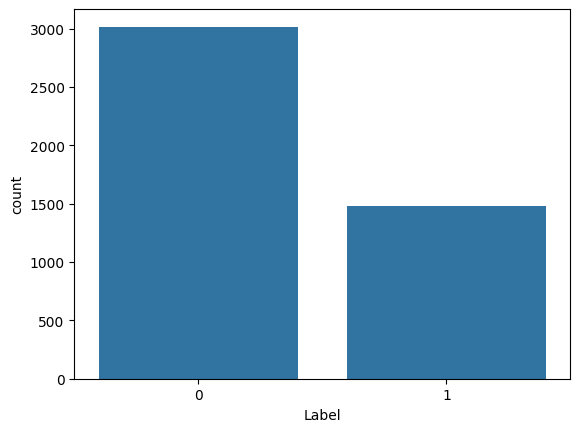

In [232]:
sns.countplot(x = "Label", data = df)
plt.show()


In [233]:

def print_corr_with(column):
  plt.figure(figsize=(9, 6))
  sns.heatmap(df.corr(), annot=True)
  plt.show()


  column_corr = df.corr()[column].sort_values(ascending=False)

  column_corr = column_corr.abs().sort_values(ascending=False)

  print("absolute correlation with", column)
  print(column_corr)



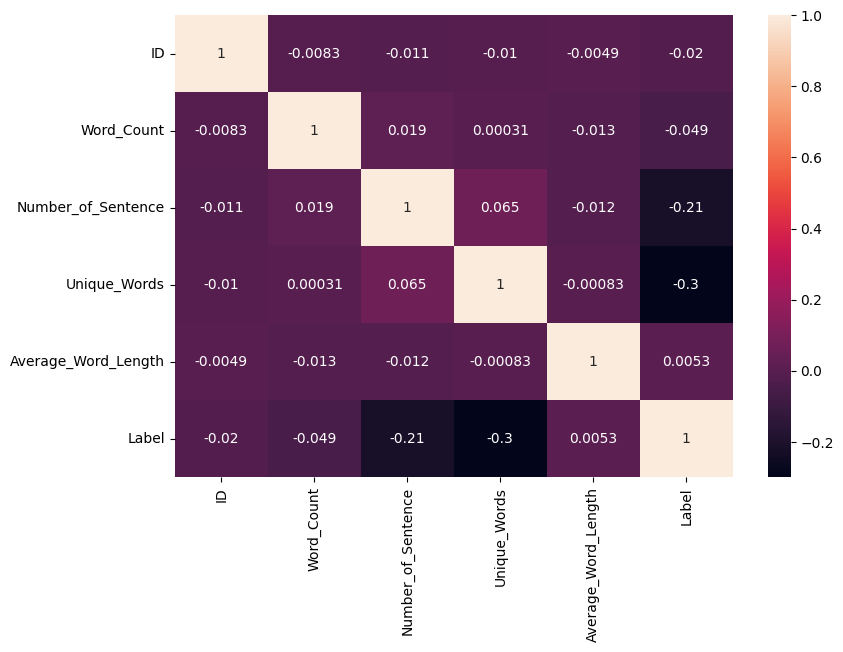

absolute correlation with Label
Label                  1.000000
Unique_Words           0.299647
Number_of_Sentence     0.214928
Word_Count             0.048932
ID                     0.020375
Average_Word_Length    0.005308
Name: Label, dtype: float64


In [234]:
print_corr_with('Label')

In [235]:

df['Average_Words_Per_Sentence'] = df['Word_Count'] / df['Number_of_Sentence']


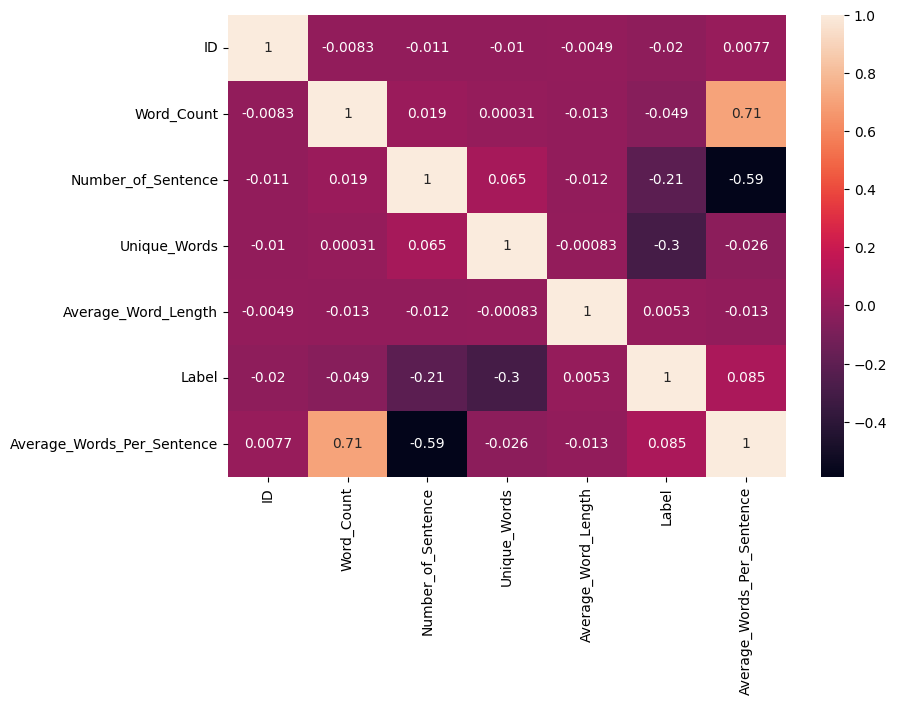

absolute correlation with Label
Label                         1.000000
Unique_Words                  0.299647
Number_of_Sentence            0.214928
Average_Words_Per_Sentence    0.084501
Word_Count                    0.048932
ID                            0.020375
Average_Word_Length           0.005308
Name: Label, dtype: float64


In [236]:
print_corr_with('Label')


In [237]:

df['Character_Count'] = df['Average_Word_Length'] / df['Word_Count']


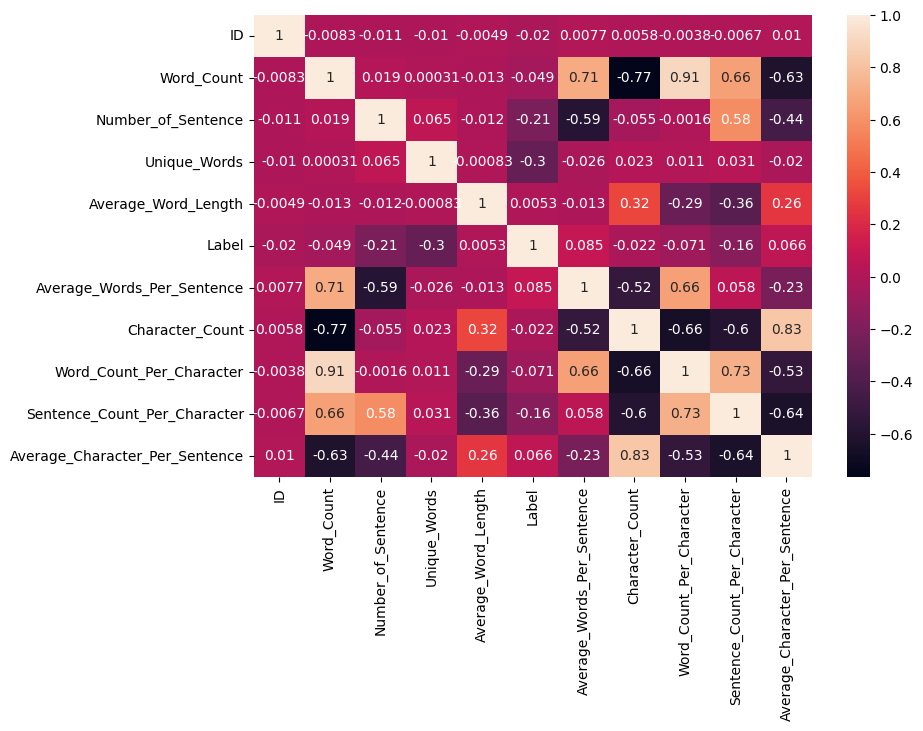

absolute correlation with Label
Label                             1.000000
Unique_Words                      0.299647
Number_of_Sentence                0.214928
Sentence_Count_Per_Character      0.162073
Average_Words_Per_Sentence        0.084501
Word_Count_Per_Character          0.070835
Average_Character_Per_Sentence    0.066174
Word_Count                        0.048932
Character_Count                   0.022102
ID                                0.020375
Average_Word_Length               0.005308
Name: Label, dtype: float64


In [238]:

df['Word_Count_Per_Character'] = df['Word_Count'] / df['Character_Count']
df['Word_Count_Per_Character'] = df['Word_Count'] / df['Character_Count']
df['Sentence_Count_Per_Character'] = df['Number_of_Sentence'] / df['Character_Count']
df['Average_Character_Per_Sentence'] = df['Character_Count'] / df['Number_of_Sentence']

print_corr_with('Label')



In [239]:

print("Mean of features values when news are fake")
print(df.loc[df['Label'] == 1].mean())

print("\n\nMean of features values when news are real")
print(df.loc[df['Label'] == 0].mean())


Mean of features values when news are fake
ID                                5393.613621
Word_Count                          52.198247
Number_of_Sentence                   7.890088
Unique_Words                        20.011463
Average_Word_Length                  4.976828
Label                                1.000000
Average_Words_Per_Sentence           7.684886
Character_Count                      0.123295
Word_Count_Per_Character           687.898028
Sentence_Count_Per_Character        86.811927
Average_Character_Per_Sentence       0.018509
dtype: float64


Mean of features values when news are real
ID                                5506.264833
Word_Count                          54.787206
Number_of_Sentence                   9.448127
Unique_Words                        27.367584
Average_Word_Length                  4.963817
Label                                0.000000
Average_Words_Per_Sentence           6.828038
Character_Count                      0.127851
Word_Count_Per_Characte

In [240]:

diff = df.loc[df['Label'] == 0].mean() - df.loc[df['Label'] == 1].mean()
print("Difference between mean of features values when news are fake and real:")
print(diff)


Difference between mean of features values when news are fake and real:
ID                                112.651212
Word_Count                          2.588959
Number_of_Sentence                  1.558040
Unique_Words                        7.356120
Average_Word_Length                -0.013011
Label                              -1.000000
Average_Words_Per_Sentence         -0.856848
Character_Count                     0.004556
Word_Count_Per_Character           97.113137
Sentence_Count_Per_Character       24.401786
Average_Character_Per_Sentence     -0.002332
dtype: float64


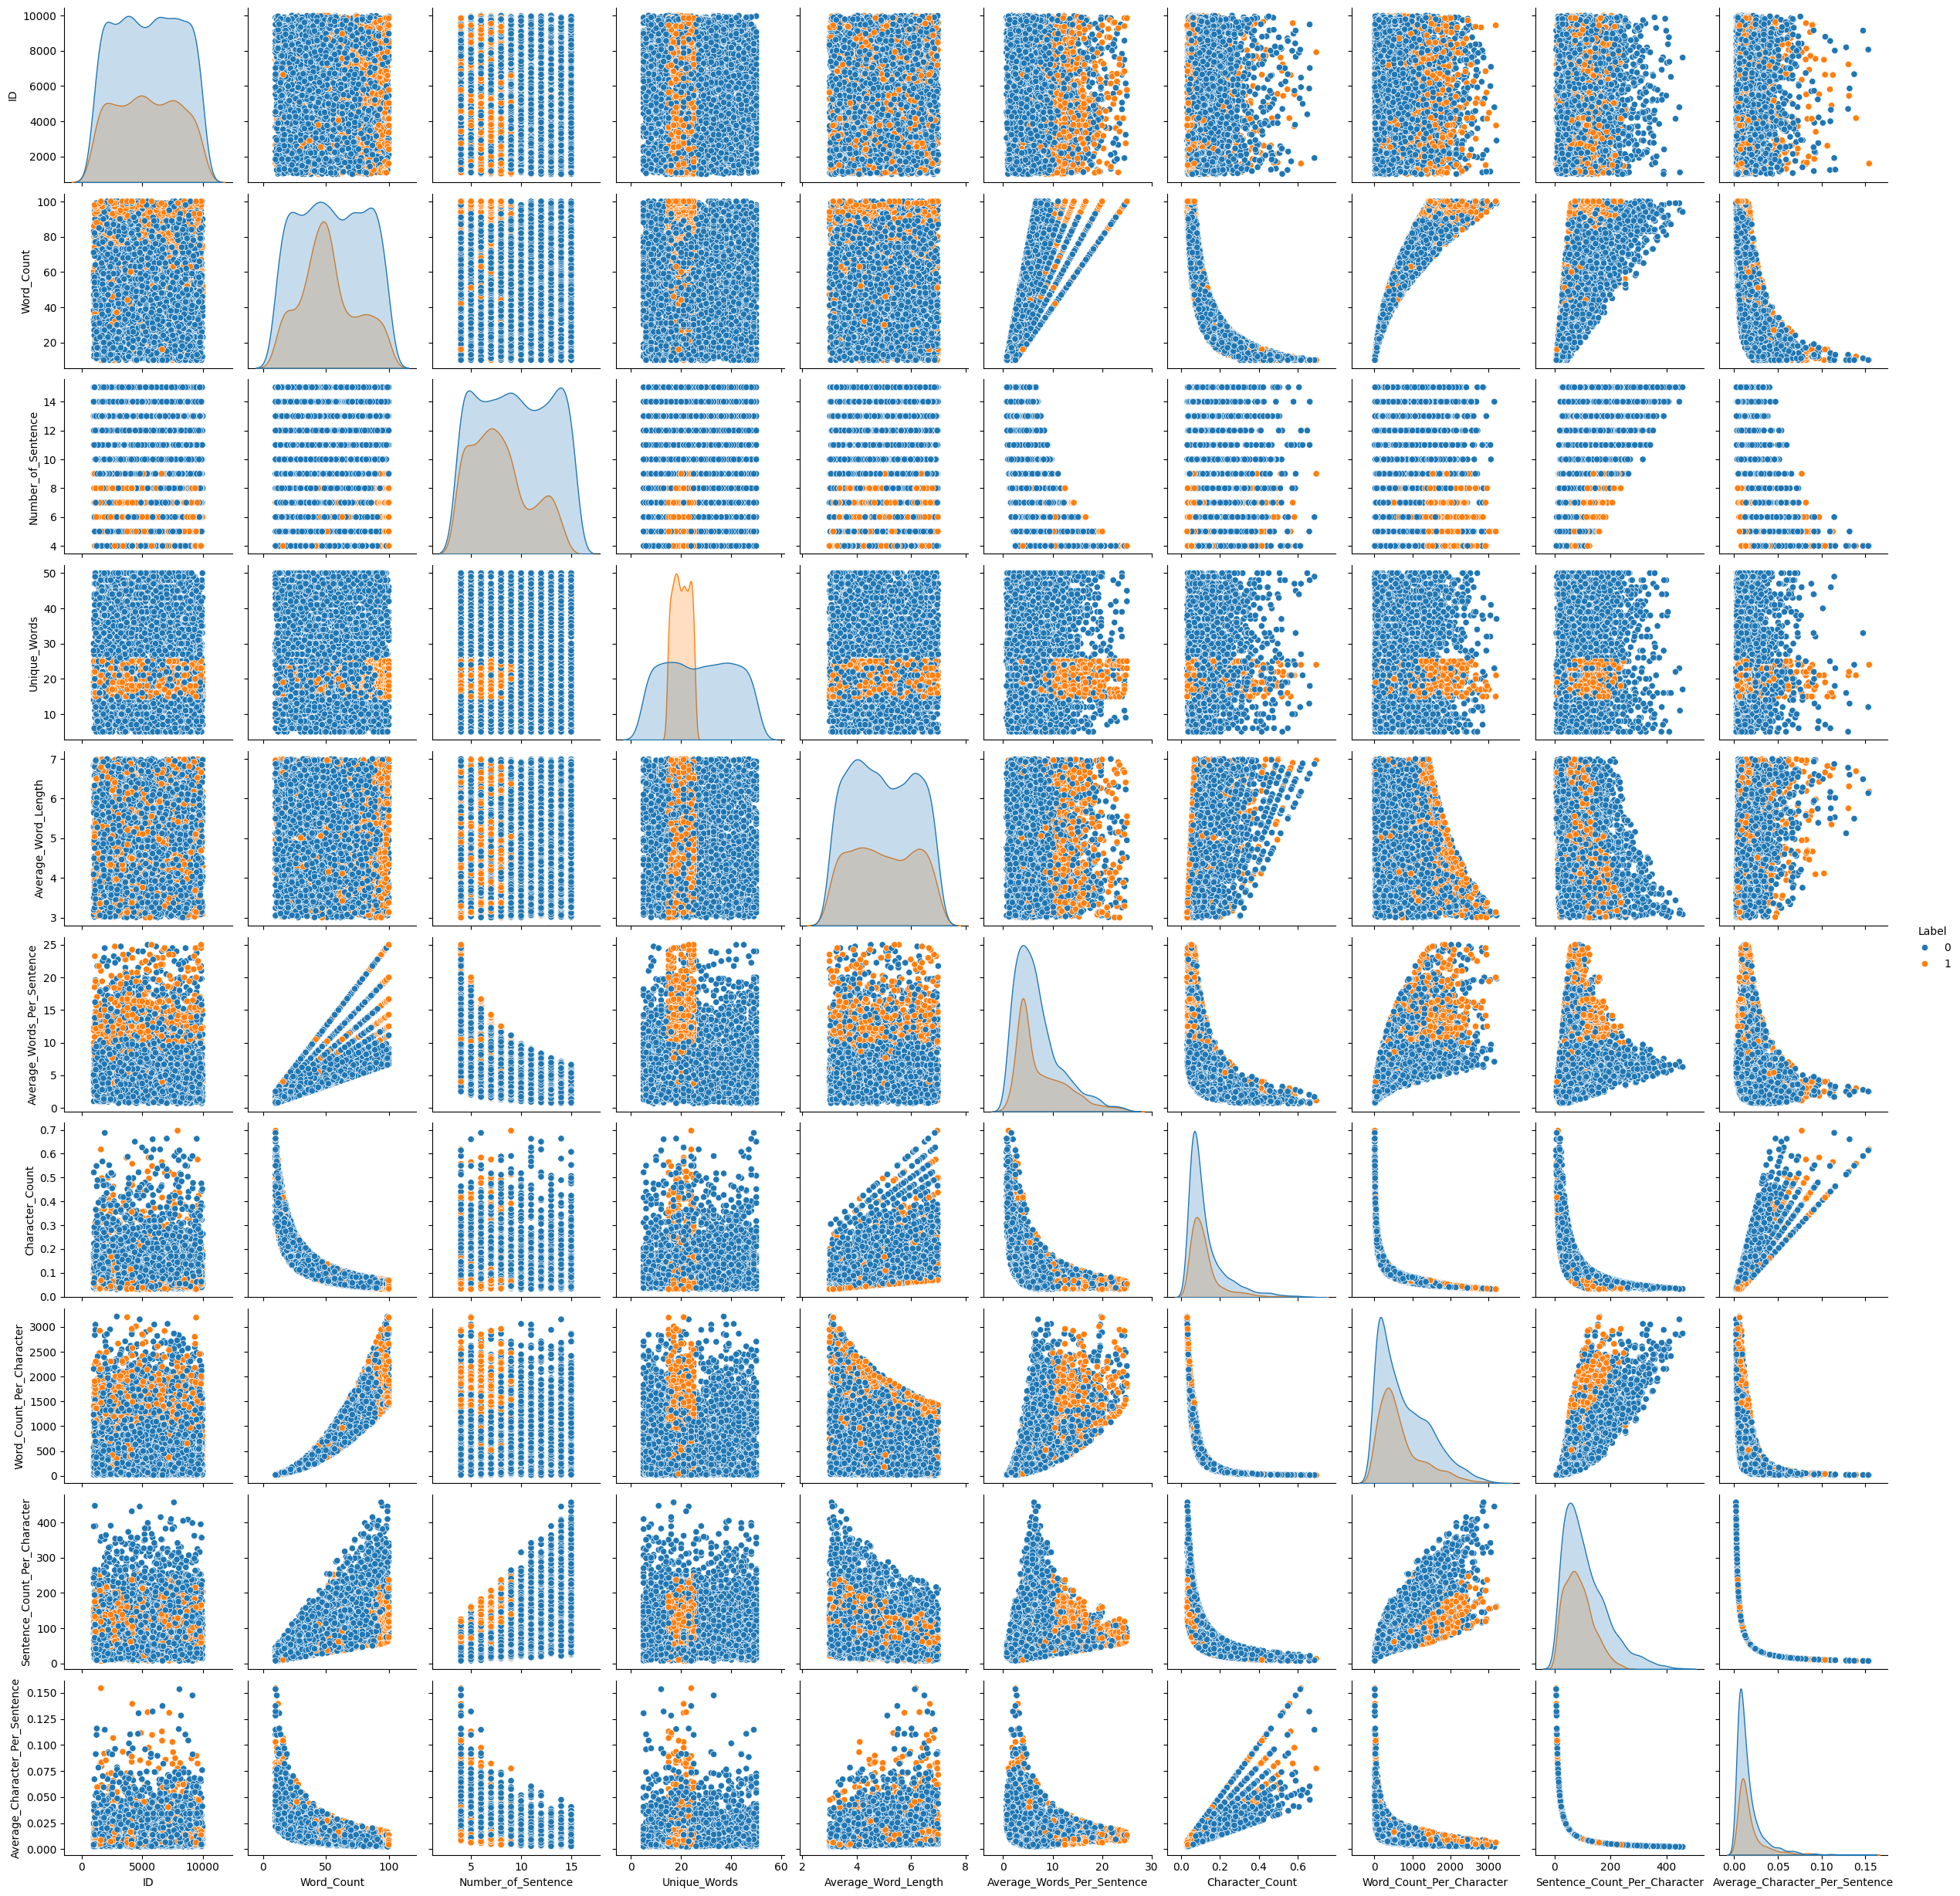

In [241]:

sns.pairplot(df, hue='Label')
plt.show()


In [251]:
x = df.drop(columns=["Label", "Average_Character_Per_Sentence"])
y = df['Label']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


In [247]:

model = XGBClassifier()

params = {
    'eta': [0.001, 0.01, 0.1, 0.2, 0.3],
    'gamma': [0, 0.25, 0.5, 1.0],
    'max_depth': [int(x) for x in np.linspace(5, 30, num=6)],
    'min_child_weight': [3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8]
}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='f1', verbose=1)



In [253]:
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'gamma': [0, 0.25, 0.5, 1.0],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_child_weight': [3, 4, 5, 6],
                         'subsample': [0.6, 0.7, 0.8]},
             scoring='f1', verbose=1)

In [254]:

best_model = grid_search.best_estimator_

print("Best parameters:")
print(grid_search.best_params_)

print("Best model score:")
print(grid_search.best_score_)


Best parameters:
{'eta': 0.01, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}
Best model score:
0.8916094582483309


In [255]:

y_pred = best_model.predict(x_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 score:", f1_score(y_test, y_pred))
print("Test recall score:", recall_score(y_test, y_pred))
print("Test precision score:", precision_score(y_test, y_pred))



Test accuracy: 0.8866666666666667
Test F1 score: 0.8587257617728531
Test recall score: 0.9872611464968153
Test precision score: 0.7598039215686274


In [256]:
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       293
           1       0.76      0.99      0.86       157

    accuracy                           0.89       450
   macro avg       0.88      0.91      0.88       450
weighted avg       0.91      0.89      0.89       450



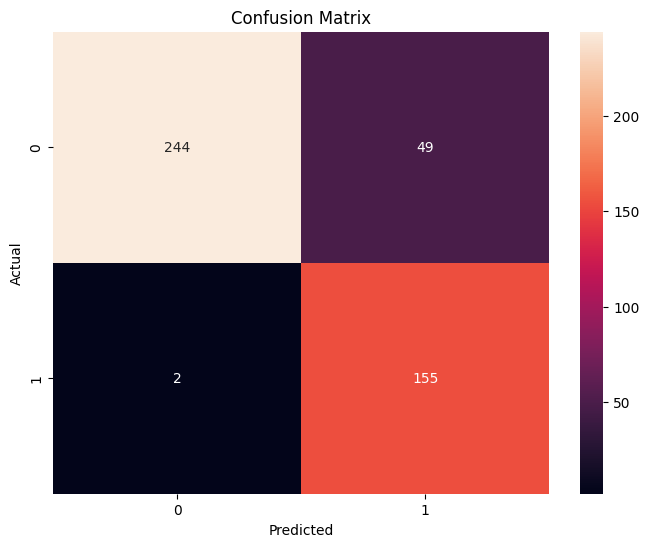

In [257]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

[[0.83276451 0.16723549]
 [0.01273885 0.98726115]]


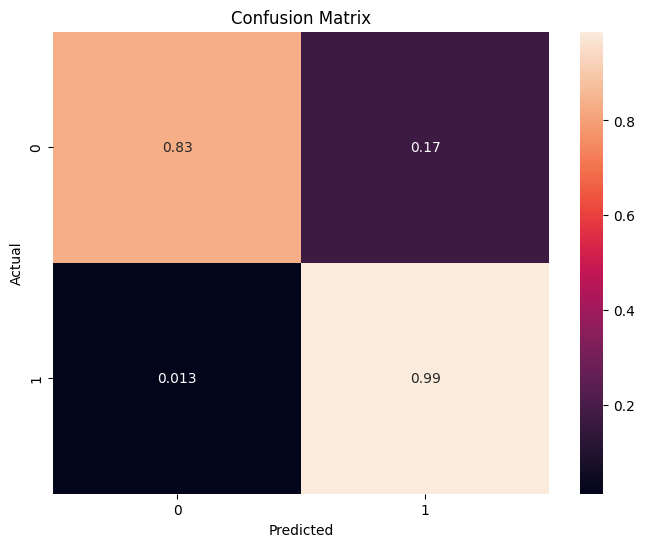

In [263]:


cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print(cm_norm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [264]:
# Accuracy will be ignored due to the imbalanced data
# Recall will be used to evaluate the model
recall = recall_score(y_test, y_pred)
print("Recall:", recall)




Recall: 0.9872611464968153
